# Applied Linear Algebra - Lab 3
    Ferdowsi University of Mashhad - Department of Computer Engineering

***Winter 2024***
> #### ***If you've any question, feel free to ask:*** $$@Maresha82$$

### Table of Contents

* [Determinant](#determinant)
    * [Exercise1](#exercise-1)
        * [Test](#test-your-function) $\checkmark$
    
* [Cramer's rule](#cramers-rule)
    * [Exercise2](#exercise-2)
        * [Test](#show-time)$\checkmark$
        * [Exercise 2.1](#exercise-21)
* [Eigen value and eigen vector](#eigen-value-and-eigen-vector)
    * [Von Mises](#von-mises-iteration-algorithm)
        * [Exercise 3](#exercise-3)
            * [Exercise 3.1](#exercise-31)
            * [Exercise 3.2](#exercise-32)
            * [Exercise 3.3](#exercise-33)
            * [Exercise 3.4](#exercise-34)
            * [Exercise 3.5](#exercise-35)
            * [Exercise 3.6](#exercise-36)
        * [Test](#show-time)$\checkmark$
* [Markov chain](#markov-chain)
    * [What is Markov Chain?!](#now-what-is-markov-chain)
        * [Properties of markov chain](#now-what-is-markov-chain)
        * [Exercise 4](#exercise-4)
    * [Population problem](#population-problem)
        * [Exercise 4.1](#exercise-41)
        * [Exercise 4.2](#exercise-42)
    * [Predicting distant future](#predicting-distant-future)
        * [Exercise 4.3](#exercise-43)
        * [Exercise 4.4](#exercise-44)
    * [Steady state vectors](#steady-state-vectors)
        * [Someone said eigenvalue ?!](#someone-said-eigen-value)
        * [Exercise 4.5](#exercise-45)
            * [Exercise 4.5.1](#exercise-451)
            * [Exercise 4.5.2](#exercise-452)
    * [Diagnoalization](#diagonalization)
        * [Exercise 4.6](#exercise-46)
            * [Exercise 4.6.1](#exercise-461)
            * [Exercise 4.6.2](#exercise-462)
            * [Exercise 4.6.3](#exercise-463)
            * [Exercise 4.6.3.1](#exercise-4631)
            * [Exercise 4.6.3.2](#exercise-4632)
* [Google page rank algorithm](#google-page-rank-algorithm)
    * [The insight](#the-insight)
    * [Random Walks](#random-walks)
        * [Absorbing bounderies](#absorbing-bounderies)
        * [Exercise 5.1](#exercise-51)
        * [Exercise 5.2](#exercise-52)
        * [Exercise 5.3](#exercise-53)
    * [Random Walks on undirected graph](#random-walks-on-undirected-graph)
        * [Exercise 5.4](#exercise-54)
    * [Someone directed graph?!](#someone-said-directed-graph)
        * [Exercise 5.5](#exercise-55)
    * [Structure of Internet](#structure-of-the-internet)
    * [The Real Ones!](#the-real-ones)
        * [Exercise 5.6](#exercise-56)
        * [Exercise 5.7](#exercise-57)
        * [Exercise 5.8](#exercise-58)
        * [Exercise 5.9](#exercise-59)
        * [Exercise 5.10](#exercis-510)
        * [Final Exercise!](#final-exercise)

Welcome to extraordinary applied linear algebra project.    
In this project we're going to discover the most sensational parts of applied linear algebra which has a sentimental connection with Reinforcement Learning and other things.    
Let's have a look on...

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf

## Determinant
Since calculating the determinant of a square matrix is a fundamental operation in linear algebra, We must consider to gain those reliable data.  
As you may know, you can calculate the determinant of a 2*2 matrix like this:
$$
\
\begin{vmatrix}
a & b \\
c & d \\
\end{vmatrix}
= ad - bc
$$

And such a similar manner for 3*3:   
$$
\ \begin{vmatrix}
a & b & c \\
d & e & f \\
g & h & i \\
\end{vmatrix}
= a(ei - fh) - b(di - fg) + c(dh - eg)
$$
Now let's calculate the determinant of an arbitrary matrix using numpy.

### Exercise 1
Implement a function to calculate the determinant of a mtrix.   
Remember you're not allowed to use built-in functions of any provided libraries such as numpy and etc.(It would be guaranteed that your matrix is an $n*n$ matrix.)

<details>
    <summary>Hint No.1</summary>
    <p>
    Highly recommended to implement it using gaussian elimination tactics
    <ul>
    <li>Use Gaussian elimination to convert the matrix to upper triangular form </li>
    <li>Swap rows to get a non-zero diagonal element</li>
    <li>If no non-zero element is found, determinant is zero</li>
    <li>Eliminate the elements below the diagonal</li>
    <li>If no non-zero element is found, determinant is zero</li>
</ul>
    </p>
</details>

In [41]:
def determinant(matrix):
    n = matrix.shape[0]

    # Make a copy of the matrix to avoid modifying the original
    mat_copy = matrix.astype(float)

    for i in range(n):
        #TODO
        pass

    # Multiply the diagonal elements to get the determinant
    det = np.prod(np.diagonal(mat_copy))

    return det




Determinant: 43.0


#### Test your function
As you may know we've some built-in function that can be used in order to calculate the determinant of a matrix.

In [42]:
test_matrix = np.array([[4, -2, 1],
                         [-2, 5, 3],
                         [1, 3, 6]])

In [45]:
# Tensorflow

# tensor
tf_matrix = tf.constant(test_matrix, dtype=tf.float32)
tf_result = tf.linalg.det(tf_matrix).numpy()

#Numpy
np_result=np.linalg.det(test_matrix)

#Your Function
det_result = determinant(test_matrix)

det_result,np_result,tf_result

(43.0, 43.0, 43.000004)

## Cramer's rule   
Cramer's Rule is a mathematical technique used to solve a system of linear equations with as many equations as unknowns, provided that the system's coefficient matrix is non-singular (i.e., its determinant is non-zero). It provides a method to find the unique solution for each variable in terms of determinants.   
You may know how to use cramer's rule but you can use the matrix that has provided below.
$$
\
x_1 = \frac{\begin{vmatrix} b_1 & a_{12} & a_{13} \\ b_2 & a_{22} & a_{23} \\ b_3 & a_{32} & a_{33} \end{vmatrix}}{\begin{vmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{vmatrix}}
\;
x_2 = \frac{\begin{vmatrix} a_{11} & b_1 & a_{13} \\ a_{21} & b_2 & a_{23} \\ a_{31} & b_3 & a_{33} \end{vmatrix}}{\begin{vmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{vmatrix}}\\
x_3 = \frac{\begin{vmatrix} a_{11} & a_{12} & b_1 \\ a_{21} & a_{22} & b_2 \\ a_{31} & a_{32} & b_3 \end{vmatrix}}{\begin{vmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{vmatrix}}
$$   



### Exercise 2
In this exercise we want to calculate the answer of the linear system using cramer's rule.
Feel free to use any built-in function in order to calculate the determinant

In [5]:
def cramer_rule(matrix_A, vector_b):
    # Calculate the determinant of the coefficient matrix
    # You can also put your function of determinant here.
    # det_A = np.linalg.det(matrix_A)
    if det_A == 0:
        raise ValueError("The determinant of the coefficient matrix is zero. Cramer's Rule cannot be applied.")

    n = matrix_A.shape[0]
    solutions = []

    for i in range(n):
        # Create a copy of the coefficient matrix and replace the i-th column with the vector b
        matrix_A_i = matrix_A.copy()
        # matrix_A_i[:, i] = ?
        #TODO
          # vector_b
        # Calculate the determinant of the modified matrix
        det_A_i = np.linalg.det(matrix_A_i)

        # Cramer's Rule: x_i = det(A_i) / det(A)
        # solution_i = det_A_i / det_A
        solutions.append(?)

    return solutions

SyntaxError: ignored

#### Show time!   
You can test your code here:

In [8]:
A_matrix = np.array([[2, -1, 3],
                     [1, 2, 1],
                      [3, 4, 5]], dtype=float)

b_vector = np.array([8, 5, 1], dtype=float)

In [30]:
#Numpy
np_result=np.linalg.solve(A_matrix,b_vector)
#Your function
you= cramer_rule(A_matrix,b_vector)

#### Exercise 2.1:
Based on what you've learned before,
Provide some tensorflow fucntion that can solve our system.

In [31]:
#Tensorflow
# TODO



## Eigen value and eigen vector
Eigenvalues and eigenvectors are fundamental concepts in linear algebra. Let's delve into an explanation.     
  

In linear algebra, consider a square matrix
$A$ .An eigenvector $(
v)$ and its corresponding eigenvalue $(λ)$ satisfy the following equation:
$$Av=\lambda v$$  
- $A \rightarrow$ Square matrix
- $v \rightarrow$ eigen vector
- $\lambda \rightarrow$ eigen value

**Eigen vector equation:**   
$$(A-\lambda I)v=0$$   
$I$ is identity matrix.   
**Eigen value equation:**   
$$det(A-\lambda I)=0$$   
This equation yields the eigenvalues $\lambda_1,\lambda_2,...,\lambda_n$ for $n* n$ matrix.  
e.g.
$$A=
\begin{bmatrix} 4 & -1 \\ 2 & 1 \end{bmatrix}\\
$$
----
$$\text{det}\left(\begin{bmatrix} 4-\lambda & -1 \\ 2 & 1-\lambda \end{bmatrix}\right) = 0
$$

### Von Mises Iteration Algorithm:
In order to find eigen values and eigen vectors of a matrix, we can use an algorithm named "***Von Mises Iteration***".    
 is an eigenvalue algorithm: given a diagonalizable matrix
$A$, the algorithm will produce a number
$\lambda$ , which is the greatest (in absolute value) eigenvalue of

$A$, and a nonzero vector
$v$, which is a corresponding eigenvector of
$\lambda$ , that is,
$$ Av=\lambda v$$.    

This algorithm is also known as Power Iteration algorithm.     

Power Iteration is an iterative numerical method used to find the dominant eigenvalue and corresponding eigenvector of a square matrix. The dominant eigenvalue is the one with the **largest magnitude**. The method is particularly useful for large sparse matrices, where direct methods may be computationally expensive.  

Here are the key steps involved in the Power Iteration method:
1. ***Initialization:***   
Start with an initial guess for the eigenvector
$v_0$
 . The choice of
$v_0$
  is not critical, as long as it is not orthogonal to the eigenvector associated with the dominant eigenvalue.
2. ***Iteration:***    
Iteratively apply the matrix $A$
to the current estimate of the eigenvector
$v_k$
  and normalize the result:
  $$v_{k+1}=\frac {A_{v_k}} {||A_{v_k}||}$$   
  This step ensures that the eigenvector remains a unit vector.

3. ***Convergence:***    
Repeat the iteration until
$v_k$
  converges to the dominant eigenvector. The eigenvalue corresponding to this eigenvector is approximated by the [Rayleigh quotient](https://en.wikipedia.org/wiki/Rayleigh_quotient):
  $$\lambda_k=\frac{(A_{v_k})^Tv_k}{v^T_k v_k}$$  
  > **The eigenvalue approximation improves with each iteration.**


4. ***Eigenvalue Extraction:***    
The dominant eigenvalue is given by the Rayleigh quotient at convergence.



### Exercise 3:
Now in this section we want to calculate the eigen vectors and eigen values of an arbitrary matrix $A$ based on Von Mises algorithm.

In [46]:
A=np.array([[1,5,4],
            [7,5,1],
            [6,2,1]])
# This is our test matrix. Don't touch it :)

#### Exercise 3.1:
**Initialization**: Just provide a simple random vector to start.

In [53]:
# TODO
v=?
# Just a random 1*n vector using numpy


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Exercise 3.2:
***Iteration:***
Use a for loop to iterate over iteration number and make it as better as you can.

In [52]:
iteration=1000
n = A.shape[0]
for _ in range(iteration):
    pass

# Eigenvalue Extraction
lambda_dominant = ?

lambda_dominant, v

(11.0, array([0.5375904, 0.7044288, 0.46344  ]))

In [ ]:
#make it as function:
def power_iteration(A, num_iterations=1000):
    n = A.shape[0]

    # Step 1
    for _ in range(num_iterations):
        # Step 2
        pass
    #Eigenvalue Extraction
    lambda_dominant =?

    return lambda_dominant, v

#### Exercise 3.3:
As long as power iteration algorithm only works on diagonalizable matrix, Provide a fucntion to check if it's diagonalizable matrix or not.(feel free to use any built-in function)

In [ ]:
def diagonal(A): -> bool
  pass
  # TODO
  return result

#### Exercise 3.4:    
- Explain the relation between the number of eigen values and the rank of the matrix.
- Also explain why we need to check whether the matrix is diagonalizable or not.

> Write down what you want :)

#### Exercise 3.5:
Now as the final step just implement a function to extract all $n$ number of eigen values.


In [54]:
def eigenvalues(matrix, num_iterations):
    n = matrix.shape[0]
    eigenvalues_list = []
    eigenvectors_list = []

    for _ in range(n):
        # Use power iteration to find dominant eigenvalue and eigenvector
        eigenvalue, eigenvector = power_iteration(matrix, num_iterations)


        #TODO


        # Deflate the matrix
        matrix = matrix - eigenvalue * np.outer(eigenvector, eigenvector)

    return eigenvalues_list, eigenvectors_list

##### Show Time!
Now we need to check wheter you've implement them successfully or not.

In [55]:
#Your function
eigenvalues_result, eigenvectors_result = eigenvalues(A)
print("Eigenvalues:", eigenvalues_result)
print("Eigenvectors:")
for i, eigenvector in enumerate(eigenvectors_result):
    print(f"Eigenvalue {i+1}: {eigenvalues_result[i]}, Eigenvector: {eigenvector}")

#Numpy
np.linalg.eig(A)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([11.        , -5.16227766,  1.16227766]),
 array([[-0.5375904 , -0.71145239,  0.22224099],
        [-0.7044288 ,  0.43581731, -0.60466422],
        [-0.46344   ,  0.55127014,  0.76484647]]))

#### Exercise 3.6:
Now provide a fucntion to calcualte eigen values and eigen vectors using tensorflow.

In [ ]:
# TODO
#tf.linalg.eig ...

## Markov Chain
Let's say hi to reinforcement learning 🔥    
Don't worry we just need to discover a tiny part of that which related to linear algebra.

You can read about [Andrey markov](https://en.wikipedia.org/wiki/Andrey_Markov).    

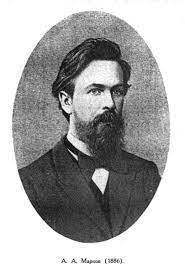

Markov started out working in number theory but then got interested in probability. He enjoyed poetry and the great Russian poet Pushkin. Markov studied the sequence of letters found in the text of Eugene Onegin, in particular the sequence of consonants and vowels.

He sought a way to describe patterns in sequences, such as text like Eugene Onegin. This eventually led to the idea of a system in which one transitions between states, and the probability of going to another state depends only on the current state.

Hence, Markov pioneered the study of systems in which the future state of the system depends only on the present state in a random fashion. This has turned out to be a terrifically useful idea. For example, it is the starting point for analysis of the movement of stock prices, and the dynamics of animal populations.

These have since been termed “Markov Chains.”

### Now what is Markov Chain?

---
A Markov chain is a mathematical model of a sequence of random events where the probability of each event depends only on the state of the system immediately before it. This means that the future state of the system depends only on the present state, and not on the past states. Markov chains are used to model a wide variety of phenomena, including the behavior of gamblers, the spread of disease, and the evolution of languages.    



A [markov chain](https://en.wikipedia.org/wiki/Markov_chain) is a tuple $(S,P)$ :
- $S \rightarrow$ finite set of states
- $P \rightarrow$ is a transition probability matrix on $S$

The transition probability matrix $P$ is a square matrix of size $|S| × |S|$, where $|S|$ is the number of states in $S$. The entry $P_{ij}$ in matrix $P$ represents the probability of transitioning from state $i$ to state $j$.     


![Mar](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Markovkate_01.svg/260px-Markovkate_01.svg.png)

**Properties of Markov Chains:**

- **Markov property:**    
 The probability of a transition from state $i$ to state $j$ only depends on the **current** state $i$, and not on the past states of the system.

- **Stationarity:**    
The Markov chain has a stationary distribution if there exists a probability distribution $π$ on $S$ such that $π = πP$. The stationary distribution is a long-run equilibrium distribution of the Markov chain.

- **Ergodicity:**    
The Markov chain is ergodic if for every pair of states $i$ and $j$, there exists a positive integer n such that $P^n_{ij} > 0$. Ergodicity means that the Markov chain has a unique stationary distribution, and that the system will eventually converge to this distribution from any initial state.


$$\begin{align*}
S &= \text{Set of states} \\
P &= \text{Transition probability matrix} \\
P_{ij} &= \text{Probability of transitioning from state } i \text{ to state } j \\
\pi &= \text{Stationary distribution} \\
P^n &= \text{Product of the transition probability matrix P} \\
\pi P &= \pi \Longleftrightarrow \pi \text{ is stationary} \\
\text{ergodic} &= \text{Markov chain will eventually converge to stationary distribution}
\end{align*}
$$   
Markov chains are essential tools in understanding, explaining, and predicting phenomena in computer science, physics, biology, economics, and finance.

Now we will study an application of linear algebra. You will see how the concepts we use, such as vectors and matrices, get applied to a particular problem.

> Many applications in computing are concerned with how a system behaves over time.


Think of a Web server that is processing requests for Web pages, or network that is moving packets from place to place.We would like to describe how systems like these operate, and analyze them to understand their performance limits.     
The way we model this is:    
- we define some vector that describes the state of the system, and,   

- we formulate a rule that tells us how to compute the next state of the system based on the current state of the system.

So we would say that the state of the system at time $k$ is a vector $X_k \in ℜ^n$ , and
$$ x_{k+1}=T(X_k) \; , for \; time \; k=0,1,2,...\\
T: ℜ^n → \Re ^n$$



This situation is so common that it goes by many names:

* In physics, this is called a __dynamical system__.  
    * Here, $x_k$ might represent the position and velocity of a particle.
    
* When studying algorithms, this is called a __recurrence relation.__  
    * Here, ${\bf x_k}$ might represent the number of steps needed to solve a problem of size $k$.
    
* Most commonly, this is called a __difference equation.__
    * The reason for this terminology is that it is a discrete analog of a differential equation in $k$.

The vector ${\bf x_k}$ is called the state vector.     

Of course, we are going to be particularly interested in the case where $T$ is a linear transformation.   

Then we know that we can write the difference equation as:

$$ {\bf x_{k+1}} = A{\bf x_k},$$

where $A \in \mathbb{R}^{n\times n}.$   

This is a _linear difference equation._

#### Exercise 4
Tell us an example of markov-chain usage in real world problems

> Your answer here

### **Population Problem**
We are interested in the population of two regions, say the city and the suburbs.  

Fix an initial year (say 2000) and let

$$ {\bf x_0} = \left[\begin{array}{cc}\mbox{population of the city in 2000}\\\mbox{population of the suburbs in 2000}\end{array}\right].$$

Then

$$ {\bf x_1} = \left[\begin{array}{cc}\mbox{population of the city in 2001}\\\mbox{population of the suburbs in 2001}\end{array}\right],$$

$${\bf x_2} = \left[\begin{array}{cc}\mbox{population of the city in 2002}\\\mbox{population of the suburbs in 2002}\end{array}\right],$$

$$\dots \mbox{etc.}$$


We only concern ourselves with movements of people between the two regions.
* no immigration, emigration, birth, death, etc.

We assume that measurements have shown the following pattern:

in any given year,

* 5% of the people in the city move to the suburbs, and
* 3% of the people in the suburbs move to the city.     

You can think of this as:

$$\begin{array}{rcc}&\mbox{From City}&\mbox{From Suburbs}\\\mbox{To City}& .95&.03\\\mbox{To Suburbs}&.05&.97\end{array}$$

Then we can capture this update rule as a matrix:

$$A = \left[\begin{array}{rr}.95&.03\\.05&.97\end{array}\right].$$

We can see that this is correct by verifying that:

$$\left[\begin{array}{cc}\mbox{city pop. in 2001}\\\mbox{suburb pop. in 2001}\end{array}\right] =\left[\begin{array}{rr}.95&.03\\.05&.97\end{array}\right] \left[\begin{array}{cc}\mbox{city pop. in 2000}\\\mbox{suburb pop. in 2000}\end{array}\right].$$


Let's look at $A$ again:

$$A = \left[\begin{array}{rr}.95&.03\\.05&.97\end{array}\right].$$
We note that $A$ has a special property: each of its columns adds up to 1.   

Also, it would not make sense to have negative entries in $A$.   
The reason that columns sum to 1 is that the total number of people in the system is not changing over time.   

This leads to three definitions:     

- **probability vector**:    
is a vector of nonnegative entries that sums to 1.
- **Stochastic matrix**:   
 is a square matrix of nonnegative values whose columns each sum to 1.  
- **Markov chain**:    
 is a dynamical system whose state is a probability vector and which evolves according to a stochastic matrix.  

That is, it is a probability vector ${\bf x_0}$ and a stochastic matrix $A \in \mathbb{R}^{n\times n}$ such that

$${\bf x_{k+1}} = A{\bf x_k}\;\;\;\mbox{for}\;k = 0,1,2,...$$

So we think of a probability vector ${\bf x_0}$ as describing how things are "distributed" across various categories -- the fraction of items that are in each category.     

And we think of the stochastic matrix $A$
 as describing how things “redistribute” themselves at each time step.

### Exercise 4.2
Suppose that in 2000 the population of the city is 600,000 and the population of the suburbs is 400,000.  What is the distribution of the population in:
 - 2001?  
 - 2002?
 - 2018?
 - 2024?

 > hint: $x_{k+1}=Ax_k , x_{k+2}=A(Ax_{k+1})$

In [58]:
# Feel free to use any built-in function that you want

# stochastic matrix
np.array(
    [[0.95,0.03],
     [0.05,0.97]])

np.array([0.60,0.40])

# TODO



'''
Your final answer should be [0.417456 0.582544] for 2020
'''

[0.417456 0.582544]


### ***Predicting Distant Future***
We noticed that the population of the city is going down. Will everyone eventually live in the suburbs?

A important question about a Markov Chain is: what will happen in the distant future?

For example, what happens to the population distribution in our example “in the long run?”

Rather than answering that question right now, we’ll take a more interesting example.

Suppose we have a system whose state transition is described by the stochastic matrix
Suppose we have a system whose state transition is described by the stochastic matrix

$$P = \left[\begin{array}{rrr}.5&.2&.3\\.3&.8&.3\\.2&0&.4\end{array}\right]$$

and which starts int the state

$${\bf x_0} = \left[\begin{array}{r}1\\0\\0\end{array}\right].$$

Consider the Markov Chain defined by $P$ and ${\bf x_0}$, that is the chain defined as

$${\bf x_{k+1}} = P{\bf x_k}\;\;\;\mbox{for}\;k=0,1,2...$$

### Exercise 4.3
What happens to the system as time passes?
Let's compute the state vectors ${\bf x_1},\dots,{\bf x_{n}}$ to find out for n:
- n=10
- n=20
- n=30
- n=40

In [124]:
# stochastic matrix A
n=32
A = np.array(
    [[.5,.2,.3],
     [.3,.8,.3],
     [.2, 0,.4]])
# initial state vector
x = np.array([1,0,0])

# array to hold each future state vector
xs = np.zeros((n,3))

# compute future state vectors
for i in range(n):
    pass
    # TODO

x(0) = [1 0 0]
x(1) = [0.5 0.3 0.2]
x(2) = [0.37 0.45 0.18]
x(3) = [0.329 0.525 0.146]
x(4) = [0.3133 0.5625 0.1242]
x(5) = [0.30641 0.58125 0.11234]
x(6) = [0.303157 0.590625 0.106218]
x(7) = [0.3015689 0.5953125 0.1031186]
x(8) = [0.30078253 0.59765625 0.10156122]
x(9) = [0.30039088 0.59882813 0.10078099]
x(10) = [0.30019536 0.59941406 0.10039057]
x(11) = [0.30009767 0.59970703 0.1001953 ]
x(12) = [0.30004883 0.59985352 0.10009765]
x(13) = [0.30002441 0.59992676 0.10004883]
x(14) = [0.30001221 0.59996338 0.10002441]
x(15) = [0.3000061  0.59998169 0.10001221]
x(16) = [0.30000305 0.59999084 0.1000061 ]
x(17) = [0.30000153 0.59999542 0.10000305]
x(18) = [0.30000076 0.59999771 0.10000153]
x(19) = [0.30000038 0.59999886 0.10000076]
x(20) = [0.30000019 0.59999943 0.10000038]
x(21) = [0.3000001  0.59999971 0.10000019]
x(22) = [0.30000005 0.59999986 0.1000001 ]
x(23) = [0.30000002 0.59999993 0.10000005]
x(24) = [0.30000001 0.59999996 0.10000002]
x(25) = [0.30000001 0.59999998 0.10000001]
x(2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


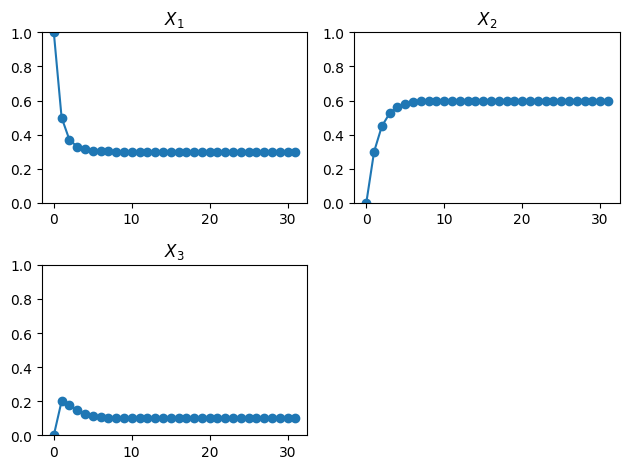

In [121]:
#These plots show you what's going to happen after several steps:
for i in range(3):
    ax = plt.subplot(2, 2, i+1)
    plt.plot(range(n), xs.T[i], 'o-')
    ax.set_ylim([0, 1])
    name="X_{}".format(i+1)
    plt.title("$"+name+"$", size=12)
plt.tight_layout()


### Exercise 4.4:
Why the result gonna fix after a constant amount of step?

> Your answer here.

Based on visual inspection, these vectors seem to be approaching

$${\bf q} = \left[\begin{array}{r}.3\\.6\\.1\end{array}\right].$$

The components of ${\bf x_k}$ don't seem to be changing much past about $k = 20.$

In fact, we can confirm that the this system would be stable at $\left[\begin{array}{r}.3\\.6\\.1\end{array}\right]$ by noting that:

$$\left[\begin{array}{rrr}.5&.2&.3\\.3&.8&.3\\.2&0&.4\end{array}\right]\left[\begin{array}{r}.3\\.6\\.1\end{array}\right] = \left[\begin{array}{r}.15+.12+.03\\.09+.48+.03\\.06+0+.04\end{array}\right] = \left[\begin{array}{r}.3\\.6\\.1\end{array}\right].$$

This calculation is exact.  So it seems that:

* the sequence of vectors is approaching $\left[\begin{array}{r}.3\\.6\\.1\end{array}\right]$ as a limit, and
* when and if they get to that point, they will **stabilize** there.

### Steady-State Vectors
This convergence to a "steady state" is quite remarkable.  Is this a general phenomenon?
**steady-state vector** :    
If $P$ is a stochastic matrix, then a __steady-state vector__ (or __equilibrium vector__) for $P$ is a probability vector $\bf q$  such that:

$$P{\bf q} = {\bf q}.$$

> It can be shown that __every stochastic matrix has at least one steady-state vector.__

__Example.__

$\left[\begin{array}{r}.3\\.6\\.1\end{array}\right]$ is the steady-state vector for $\left[\begin{array}{rrr}.5&.2&.3\\.3&.8&.3\\.2&0&.4\end{array}\right].$



***Another Example:***
The probability vector ${\bf q} = \left[\begin{array}{r}.375\\.625\end{array}\right]$ is a steady-state vector for the population migration matrix $A$, because

$$A{\bf q} = \left[\begin{array}{rr}.95&.03\\.05&.97\end{array}\right]\left[\begin{array}{r}.375\\.625\end{array}\right] = \left[\begin{array}{r}.35625+.01875\\.01875+.60625\end{array}\right] = \left[\begin{array}{r}.375\\.625\end{array}\right] = {\bf q}.$$

To interpret this:

* if the total population of the region is 1 million,
* then if there are 375,000 persons in the city and 625,000 persons in the suburbs,
* the populations of both the city and the suburbs would stabilize -- they would __stay the same in all future years.__

### **Someone said Eigen value?**
There is a strong connection between finding the **steady state** of a Markov chain and **eigen values** and eigen vectors. The steady state of a Markov chain is the long-term distribution of probabilities that the chain will be in each state. This distribution is important because it represents the long-run equilibrium of the system.  
> The eigen values and eigen vectors of a Markov chain are closely related to the steady state.  

Specifically, the eigen value 1 of the transition matrix corresponds to the steady state distribution of the Markov chain. This means that the steady state distribution is the eigen vector that corresponds to the eigen value 1

### Exercise 4.5:
Find out the steady state vector of the transition matrix $P$ by using this procedure:
- Calculate eigen values and eigen vectors
- Find the eigen value corresponding to 1
- Find the eigen vector corresponding to 1
- Normalize the vector in the following manner:
$$v_j=\frac{v_j}{ \sum^{n}_{i=0} v_i} $$

- return that vector

In [155]:
P = np.array([[0.5, 0.2, 0.3],
               [0.3, 0.8, 0.3],
               [0.2, 0, 0.4]])
# Don't touch this :)

In [157]:
# Remember you can use your function that implemented it before to find those
# eigen values and eigen vectors.


#TODO

#Your result -> 0.3,0.6,0.1


[0.3 0.6 0.1]


##### **Exercise 4.5.1**
Implement that function using numpy.

In [142]:
# Use Numpy
#TODO

[1.  0.2 0.5] [[ 4.42325868e-01  7.07106781e-01  2.67261242e-01]
 [ 8.84651737e-01  5.42909769e-17 -8.01783726e-01]
 [ 1.47441956e-01 -7.07106781e-01  5.34522484e-01]]
sdsd
[0.44232587 0.88465174 0.14744196]
[0.3 0.6 0.1]


##### **Exercise 4.5.2**
Implement that function using tensorflow

In [152]:
#Use Tensorflow
#TODO


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<tf.Tensor: shape=(3,), dtype=complex128, numpy=array([0.3+0.j, 0.6+0.j, 0.1+0.j])>

> **At the end your result of all those three parts should be same and equal to $[0.3 , 0.6 , 0.1]$**

#### Summary

* Many phenomena can be describe using Markov's idea:
    * There are "states", and
    * Transition between states only depends on the current state.
* Examples: population movement, jobs in a computer, consonants/vowels in a text...
* Such a system can be expressed in terms of a stochastic matrix and a probability vector.
* Evolution of the system in time is described by matrix multiplication.
* Using linear algebraic tools we can predict the steady state of such a system!

## Diagonalization
Now Let's figure out the diagonalization procedure as we may need it further.    

Diagonalization is the process of transforming a square matrix into a diagonal matrix. A diagonal matrix is a matrix in which all the off-diagonal elements are zero, and the diagonal elements are non-zero. Diagonalization is a powerful tool for solving linear systems, analyzing matrices, and understanding their properties.

### Exercise 4.6
Let's diagonalize the earlier $P$ matrix that we've provided earlier.

#### Exercise 4.6.1
Describe a complete procedure to realize how to diagonalize a matrix.


> Your answer

#### Exercise 4.6.2
Is it true that all matrices are diagonalizable?
say why or why not.

#### Exercise 4.6.3
Now let's diagonalize
 in the following manner:
- Calculate eigen values
- Calculate eigen vectors
- Create Eigen vector matrix
- Inverse the eigen vector matrix
- Diagonalize the matrix

##### Exercise 4.6.3.1
Implement the procedure which came above using numpy.

In [178]:
# Create a matrix
matrix = P

#TODO


[[ 3.00000000e-01  3.00000000e-01  3.00000000e-01]
 [ 7.67790359e-18 -2.55930120e-18 -7.67790359e-18]
 [ 2.00000000e-01 -1.33333333e-01  2.00000000e-01]]


##### Exercise 4.6.3.2
Implement the procedure which came above using tensorflow.

In [179]:
# Create a matrix
matrix = tf.constant(P)



#TODO


# tf.matmul(eig_vecs * tf.linalg.diag(eig_vals), eig_vecs_inv)

tf.Tensor(
[[ 2.9999983e-01+0.j  2.9999986e-01+0.j  2.9999995e-01+0.j]
 [ 1.6488167e-08+0.j -5.4960538e-09+0.j -1.6488160e-08+0.j]
 [ 2.0000000e-01+0.j -1.3333333e-01+0.j  2.0000002e-01+0.j]], shape=(3, 3), dtype=complex64)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Google Page Rank Algorithm
One of the most sensational part of linear algebra is its tremendous impact on real-world problems.   
In this section we're going to discover an ubelievable algorithm which has founded by Google Inc. in 1998.
![Google](https://blog.hubspot.com/hs-fs/hubfs/image8-2.jpg?width=600&name=image8-2.jpg)

Before we start,It's higly recommended to read the amazing
[Paper](https://www.cis.upenn.edu/~mkearns/teaching/NetworkedLife/pagerank.pdf) of this algorithm which has published bu University of Pennsylvania.  (It should be mentioned the core patent behind this algorithm was first developed by Sergey Berin and Larry Page the Co-founders of Google in the University of Stanford)    
![PB](https://media.wired.com/photos/5de6deca453df400086ddd80/master/pass/Biz-google-524309146.jpg)   




### **PageRank is what made Google so unique.**
The World Wide Web starting becoming widely used in 1994.

By 1998 the Web had become an indispensable information resource.

However, the problem of effectively searching the Web for relevant information was not well addressed. A number of large search engines were available, with names that are now forgotten: Alta Vista, Lycos, Excite, and others.

At present, most of them are no longer in existence, because Google emerged in 1998 and came to dominate Web search almost overnight.

How did this happen?

---

As background: a typical search engine uses a two-step process to retrieve pages related to a user’s query.

In the first step, basic text processing is done to find all documents that contain the query terms. Due to the massive size of the Web, this first step can result in many thousands of retrieved pages related to the query.

Some of these pages are important, but most are not.

The problem that Google solves better than the search engines of the mid 1990’s concerns the ordering in which the resulting search results are presented. This is the crucial factor in utility. A user wants to find the “correct” or “best” item at the top of the search results.

### **The Insight**

Around 1998, the limitations of standard search engines, which just used term frequency, we becoming apparent. A number of researchers were thinking about using additional sources of information to “rate” pages.

The key idea that a number of researchers hit on was this: links are endorsements.

When a first page contains a link to a second page, that is an indication that the author of the first page thinks the second page is worth looking at. If the first and second pages both contain the same query terms, it is likely that the second page is an important page with respect to that query term.

---

Consider a set of web pages, for a single query term (say “car manufacturers”) with this linking structure:

![set](./1.jpg)


It may be clear that the links between pages contain useful information. But what is the best way to extract that information in the form of rankings?

Here is the strategy that Brin and Page used:    
(From “The anatomy of a large-scale hypertextual Web search engine” (1998) published by Sergey Brin and Larry Page)   
![Page](./2.png)

We’ll study this algorithm, see how to implement it, and understand that what it is really about is **Markov Chains** and **eigenvectors**. 🔥🔥🔥


---

### Random walks
We start with the notion of a __random walk.__
A random walk is a model of many sorts of processes that occur on graphs.

Let us fix a graph $G$.  A random walk models the movement of an object on this graph.   
We assume that the object moves from node to node in $G$, one move per time step $t.$  At time $t$ the object is at node $k$ (say) and at the next time $t+1$ it moves to another node chosen __at random__ from among the outgoing edges.
For our initial discussion, we will assume that $G$ is the line graph:
![3](./3.jpg)


This is a graph in which each node is connected to two neighbors.  It's natural to identify the nodes with the integers $k = 1,\dots,n.$

An example application of this model would be a waiting line (or 'queue') like at a grocery store.  The current node corresponds to the number of people in the queue.   Given some number of people in the queue, only one of two things happens: either a person leaves the queue or a person joins the queue.   

To complete the definition, what happens at the endpoints of the graph (nodes 1 and $n$) must be specified.     

One possibility is for the walker to remain fixed at that location.   This is called a __random walk with absorbing boundaries.__

Another possibility is for the walker to bounce back one unit when an endpoint is reached.   This is called a __random walk with reflecting boundaries.__


We can also set a particular probability $1-p$ of moving "to the right" (from $k$ to $k+1$) and $p$ of moving "to the left" (from $k$ to $k-1$).

> ## ***We can capture the process of movement on $G$ as a Markov chain.***  



The way to interpret the steady-state of the Markov chain in terms of the random walk is:

Let the chain (random walk) start in the given state.  At some long time in the future, make an observation of the state that the chain is in.   Then the steady-state distribution gives, for each state, the probability that the chain is in that state when we make our observation.

### Absorbing Bounderies
A random walk on $\{0,1,2,3,4\}$ with absorbing boundaries has a transition matrix of

$$P=\begin{bmatrix}1&p&0&0&0\\0&0&p&0&0\\0&1-p&0&p&0\\0&0&1-p&0&0\\0&0&0&1-p&1\end{bmatrix}$$   
(based on a graph that we provided earlier)

Now Let's have this scenario:   

Consider a very simple casino game.  A gambler (with some money to lose) flips a coin and calls heads or tails.  If the gambler is correct, she wins a dollar.  If she is wrong, she loses a dollar.  The gambler will quit the game when she has either won $n-1$ dollars or lost all of her money.

Suppose that $n=5$ and the gambler starts with \$2.  The gambler's winnings must move up or down one dollar with each coin flip, and once the gambler's winnings reach 0 or 4, they do not change any more since the gambler has quit the game.  

Such a process may be modeled as a random walk on $\{0,1,2,3,4\}$ with absorbing boundaries.   Since a move up or down is equally likely in this case, $p = 1/2$.

### Exercise 5.1
The transition matrix is not regular. why?

> Your answer here

### Exercise 5.2
Why there is no unique steady state?


> Your answer here.

### Exercise 5.3
Now Let's consider $p=0.45$   
findout the probability that the gambler will lose all her money.

In [ ]:
# Your code here
iteration=100
p = 0.45
A = np.array([[1,p,0,0,0],[0,0,p,0,0],[0,1-p,0,p,0],[0,0,1-p,0,0],[0,0,0,1-p,1]])
B = A.copy()
for i in range(100):
  pass
  #TODO
print(B @ np.array([0,0,1,0,0]))

#Your answer should be near to 0.4

### Random walks on undirected graph
Now let's consider a random walk on a more interesting graph:       

![4](./4.jpg)       

This graph is undirected – each edge can be followed in either direction.

Again, at each node there is an equal probability of departing to any adjacent node.

The transition matrix associated with a random walk on this graph is

$$P = \begin{bmatrix}
0&1/3&1/4&0&0&0&0\\
1/2&0&1/4&0&1/2&0&0\\
1/2&1/3&0&1&0&1/3&0\\
0&0&1/4&0&0&0&0\\
0&1/3&0&0&0&1/3&0\\
0&0&1/4&0&1/2&0&1\\
0&0&0&0&0&1/3&0\end{bmatrix}$$

It turns out that this matrix is regular ($P^3$ has no zero entries.)

Hence, the associated Markov Chain converges to a single steady state.  (It has only one eigenvalue of 1.)

### Exercise 5.4
find out the corresponding eigen vector of this transition matrix.
and calculate the steady state.

In [182]:
A = np.array([
[   0, 1./3, 1./4, 0,    0,    0, 0],
[1./2,    0, 1./4, 0, 1./2,    0, 0],
[1./2, 1./3,    0, 1,    0, 1./3, 0],
[   0,    0, 1./4, 0,    0,    0, 0],
[   0, 1./3,    0, 0,    0, 1./3, 0],
[   0,    0, 1./4, 0, 1./2,    0, 1],
[   0,    0,    0, 0,    0, 1./3, 0]])


#TODO

[2.01007563 3.01511345 4.02015126 1.00503782 2.01007563 3.01511345
 1.00503782]


The eigenvector corresponding to the eigenvalue of 1 is the steady-state of the Markov Chain.

If you've calculated successfuly, we can find that the steady-state is $\begin{bmatrix}2\\3\\4\\1\\2\\3\\1\end{bmatrix}/16.$    

That is, the probability of bring in node 1 at steady state is 2/16;  the probability of being in node 2 is 3/16;  the probability of being in node 3 is 4/16, etc.    

If you look at the probailities of being in each node, you'll realize the connection between the **degree of nodes and and the probabilty**.

This is not a coincidence!  

In fact it can be __proved__ that the steady-state distribution of a random walk on an undirected graph is proportional to node degree.

That is, the probability of being at a particular node at steady state is proportional to that node's degree.

> This is really amazing!

### **Someone said directed graph?!**
More interesting behavior arises when we walk randomly on a __directed__ graph.  

In this graph, all edges are "one-way streets" -- nodes are joined not by lines but by arrows.   The chain can move from vertex to vertex, but only in the directions allowed by the arrows.

An example of a directed graph is:    

![5](./5.jpg)      

The transition matrix for this graph is:

$$P = \begin{bmatrix}
0&0&1/3&0&0&0\\
1/2&0&1/3&0&0&0\\
1/2&0&0&0&0&0\\
0&0&0&0&1/2&1\\
0&0&1/3&1/2&0&0\\
0&0&0&1/2&1/2&0
\end{bmatrix}$$



### Exercise 5.5
Why this matrix is not regular and we can find an specific steady state?    
(Any power of $P$
 will preserve this column of zeros)

> Your answer here

### Structure of the Internet
There are many ways to use link structure to infer which pages are most important.

There was a lot of experimentation in the late 1990s with various methods.

Here are some examples of link structures found in the Web:
![Web](https://www.cs.bu.edu/fac/crovella/cs132-book/_images/L19PageRank_65_0.png)

Why did Page and Brin settle on the **random walk** as the basis for their approach?

In fact, the intuiution they started from was simpler:

<center><font color = "yellow"><b>a page is 'important' if many 'important' pages link to it.</font> </center>

More precisely, this definition of 'importance' is:

$$\mbox{Importance of page $k$} = \sum_j \mbox{(Importance of page $j$)}\cdot\mbox{(Probability of going from page $j$ to page $k$.)}$$

This is a very intuitive definition of importance.   

There is a bit of a issue however -- it is self-referential!

The 'importance' of a page appears on both sides of the equation.

How can we solve this equation to get a fixed 'importance' for a given page?

**Answering this question is where the random walk comes in.**

What Page and Brin observed was that this equation

$$\mbox{Importance of page $k$} = \sum_j \mbox{(Importance of page $j$)}\cdot\mbox{(Probability of going from page $j$ to page $k$.)}$$

### The Real Ones!
Sergey Berin and Larry Pages were couple of engineers who have totally shocked the world.
There is a sentimental intution mapping between this idea and markov chain and that is:
$$ x= Px$$
$x \rightarrow \textbf{‘importance’ of all pages}$

$P \rightarrow \textbf{‘probability of going from page $j$ to page $k$ ' in the stochastic matrix $P$}$

Now we understand what they mean:
> PageRank can be thought of as a model of user behavior. We assume there is a “random surfer” who is given a web page at random and keeps clicking on links, never hitting “back” but eventually gets bored and starts on another random page. The probability that the random surfer visits a page is its PageRank.

What they are implying is that a random surfer should visit important pages more often and unimportant pages less often.

The way to interpret this precisely is:

1- Form the graph that encodes the connections between Web pages that are retrieved for a particular query.    

2- Construct a Markov chain that corresponds to a random walk on this graph.   

3- Rank-order the pages according to their probability in the Markov chain's steady state.

### Let's do it!(Step 1)

Now lets assume a set of webpages have been conected to each other like a directed graph that was provided earlier.

It doesn't have any unique steady-state for the specific transition matrix.(you can check it your self if you need)

We have already seen the transition matrix for this graph:

$$P = \begin{bmatrix}
0&0&1/3&0&0&0\\
1/2&0&1/3&0&0&0\\
1/2&0&0&0&0&0\\
0&0&0&0&1/2&1\\
0&0&1/3&1/2&0&0\\
0&0&0&1/2&1/2&0
\end{bmatrix}$$

We have observed that this transition matrix is __not__ regular, because for any $A^k, k>0,$ the second column will  be zero.

The reason that column 2 of $P$ is zero is that the Web page corresponding to node 2 has no links embedded in it, so there is nowhere to go from this page.   Of course this will happen a lot in an arbitrary collection of Web pages.

Note that Page and Brin say that the random surfer will occasionally "start on another random page."   In other words, it seems reasonable that when reaching a page with no embedded links, the surfer chooses another page at random.

So this motivates the first adjustment to $P$:

### Step 2.

Form the matrix $P'$ as follows:  for each column in $P$ that is entirely zeros, replace it with a column in which each entry is $1/n$.

In our example:

$$P = \begin{bmatrix}
0&0&1/3&0&0&0\\
1/2&0&1/3&0&0&0\\
1/2&0&0&0&0&0\\
0&0&0&0&1/2&1\\
0&0&1/3&1/2&0&0\\
0&0&0&1/2&1/2&0
\end{bmatrix} \;\;{\rightarrow}\;\;
P' = \begin{bmatrix}
0&1/n&1/3&0&0&0\\
1/2&1/n&1/3&0&0&0\\
1/2&1/n&0&0&0&0\\
0&1/n&0&0&1/2&1\\
0&1/n&1/3&1/2&0&0\\
0&1/n&0&1/2&1/2&0
\end{bmatrix}\;\;=\;\;
 \begin{bmatrix}
0&1/6&1/3&0&0&0\\
1/2&1/6&1/3&0&0&0\\
1/2&1/6&0&0&0&0\\
0&1/6&0&0&1/2&1\\
0&1/6&1/3&1/2&0&0\\
0&1/6&0&1/2&1/2&0
\end{bmatrix}$$

In other words, for an arbitrary set of web pages, there is no guarantee that their transition matrix will be regular.

Once again, let’s read the words of Page and Brin closely: the surfer “eventually gets bored and starts on another random page.”

### Step 3.

In practice this means that there a small probability that the surfer will jump from any page to any other page at random.

Let's call this small probability $\alpha.$

We can't just add $\alpha$ to every entry in $P'$, because then the columns of the new matrix would not sum to 1.    


Instead we decrease each entry in $P'$ by a factor of $(1-\alpha)$, and then add ${\alpha}/{n}$ to it.

So we compute the final transition matrix $P''$ as:

$$P''_{ij} = (1-\alpha)P'_{ij} + \frac{\alpha}{n}.$$

We can write this as a matrix equation:

$$P'' = (1-\alpha)P' + \frac{\alpha}{n} \mathbf{1}$$

where $\mathbf{1}$ is an $n\times n$ matrix of 1's.

In our example, let's say that $\alpha = 1/10$ (in reality it would be smaller).  So $\alpha/n = 1/60.$

Then:

$$ P' \begin{bmatrix}
0&1/6&1/3&0&0&0\\
1/2&1/6&1/3&0&0&0\\
1/2&1/6&0&0&0&0\\
0&1/6&0&0&1/2&1\\
0&1/6&1/3&1/2&0&0\\
0&1/6&0&1/2&1/2&0
\end{bmatrix} \;\;{\rightarrow}\;\; P'' = \begin{bmatrix}
1/60&1/6&19/60&1/60&1/60&1/60\\
7/15&1/6&19/60&1/60&1/60&1/60\\
7/15&1/6&1/60&1/60&1/60&1/60\\
1/60&1/6&1/60&1/60&7/15&11/12\\
1/60&1/6&19/60&7/15&1/60&1/60\\
1/60&1/6&1/60&7/15&7/15&1/60
\end{bmatrix}$$



### Exercise 5.6
Why the $P^{''}$ is regular?

> ## **$P''$ is the Markov Chain that Brin and Page defined, and which is used by PageRank to rank pages in response to a Google search.**

> your answer here

### **It's show time** 🔥
Let's find the ranking of those websites graph that we've provided earlier.
### Exercise 5.7
Now we want to calculate the Steady-state of our matrix P in the following manner:
- Calculte $P^{'}$
- Implement $\alpha$ formula
- Calculate $p^{''}$


In [187]:
the_P = np.array([
[0,0, 1./3,0,0,0],
[1./2,0,1./3,0,0,0],
[1./2,0,0,0,0,0],
[0,0,0,0,1./2.,1],
[0,0,1./3.,1./2., 0, 0],
[0,0,0, 1./2,1.2, 0]])




#TODO : find p"

(6, 6)

### Exercise 5.8
Calculate the steady-state vector of the $P^{"} matrix$

In [189]:
# If you've calculated it correctly, the P" should be:

P = np.array([
[1./60, 1./6, 19./60, 1./60, 1./60,  1./60],
[7./15, 1./6, 19./60, 1./60, 1./60,  1./60],
[7./15, 1./6,  1./60, 1./60, 1./60,  1./60],
[1./60, 1./6,  1./60, 1./60, 7./15, 11./12],
[1./60, 1./6, 19./60, 7./15, 1./60,  1./60],
[1./60, 1./6,  1./60, 7./15, 7./15,  1./60]
])

#TODO



### Exercise 5.9
Extract the corresponding eigenvector relate to $\lambda=1$
from the list of eigen vectors.

In [191]:
#TODO

### Exercis 5.10
- Normalize the eigen vector in the manner which came before
- return the steady state
- the result should be similar to the matrix below.

In [ ]:
#TODO


$\mathbf{S.state} = \begin{bmatrix}0.037\\0.054\\0.041\\0.375\\0.206\\0.286\end{bmatrix}$

## **Final Exercise**
Sort the s.state in a descending way to extract the final order of page ranking that google should provide.

> # **result: [4,6,5,2,3,1]**

In [192]:
#TODO

final order = [4 6 5 2 3 1]
importance = [0.37508082 0.28624589 0.20599833 0.05395735 0.04150565 0.03721197]


# And ...
    That's it!
    I hope that you've enjoyed.
    Wish you nothing but the best and

<center><h1><font color="#bcf20a"><b>Good Luck :)</font> </center>


> This document was compiled, gathered and coded by the teaching assistant team and may be used only for educational purposes. The authors would like to thank the many projects and educational material that made their source code freely available on the internet, especially otter-grader that made the generation and sanitization of the notebook easier.